# Regresión Logística

## Paso 1: Importar librerías

In [2]:
##Cargue de las librerías
import pandas as pd
import numpy as np
##Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
##Librerías para over y under sampling
from sklearn.utils import resample

## Paso 2: Funciones

In [3]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

# Función informe sobre los datos NAN


def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

# Función para pintar algo el histograma reemplazamos con la media o mediana


def histoPlot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

# Función para reemplazo de valore numéricos con la mediana


def imputacionNa(df, nomCol, param):
    if param == 'media':
        df[nomCol] = df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol] = df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]
# Funcion para revisar datos categóricos o texto


def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

# Función para datos categóricos modificaciones


def imputacionCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol] == busqueda, reempl, df[nomCol])
    return df[nomCol]

# Función para reeemplazo NA categóricos


def imputacionCatNa(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

# Función para cambiar datos de texto a numerico float64


def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

# Función modificar a 1 y 0 los datos categóricos


def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

# Función para variables dummies


def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

# Función cambiar encabezados del dataframe


def camEncab(df, listaN):
    df.columns = listaN
    return df

# Función para el test de Shapiro - wilk - resistente al ruido en los datos


def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

# Función para normalizar la data min - max sklearn


def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

## Función para Estandarizar la data formula z-score
def stanData(df):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df)
    df_stan = pd.DataFrame(standardized_data, columns=df.columns)
    return df_stan

## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

##Función de label encoder
def Codificacion(df, nomCol):
    label_e = LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df[nomCol]

##FUncion para oversampling
def OverSample(df, nomCol, param):
    dataFMayor = df[df[nomCol]==0]
    dataFMenor = df[df[nomCol]==1]
    df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=param,    
                                 random_state=123)
    df_Over = pd.concat([dataFMayor, df_minoritaria])
    return df_Over

##Función para correlaciones
def grafCor(matriz):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    sns.heatmap(
        matriz,
        annot     = True,
        cbar      = True,
        annot_kws = {"size": 10},
        vmin      = -1,
        vmax      = 1,
        center    = 0,
        cmap      = sns.light_palette("#0d47a1"),
        square    = True,
        ax        = ax,
        linewidth=.5
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )

    ax.tick_params(labelsize = 10)



## Paso 3: Llamado a Funciones

In [4]:
X = importDatos("./Datasets/", 'X','.csv')
y = importDatos("./Datasets/", 'y','.csv')


In [5]:
##Revisión de datos NAN
datos_NA(X)

Dimensiones : 36881 filas, 24 columnas
Total Valores NA : 74668 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                              Location     object           46          0
                               MinTemp    float64          369        338
                               MaxTemp    float64          470        242
                              Rainfall    float64          432        626
                           Evaporation    float64          215      12846
                              Sunshine    float64          144      13564
                           WindGustDir     object           16       3368
                         WindGustSpeed    float64           64       3361
                            WindDir9am     object           16       2809
                            WindDir3pm     object           16        962
                          WindSpeed9am    float64           39        662
                          WindSpeed3pm    f

In [6]:
##Valores NAN
datos_NA(y)

Dimensiones : 36881 filas, 1 columnas
Total Valores NA : 620 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                          RainTomorrow     object            2        620


In [7]:
##Limpiar NAN mintemp y max temp
X['MinTemp']= imputacionNa(X, 'MinTemp','Mediana')
X['MaxTemp']= imputacionNa(X, 'MaxTemp','Mediana')
X['Rainfall']= imputacionNa(X, 'Rainfall','Mediana')
X['Evaporation']= imputacionNa(X, 'Evaporation','Mediana')
X['Sunshine']= imputacionNa(X, 'Sunshine','Mediana')
X['WindGustSpeed']= imputacionNa(X, 'WindGustSpeed','Mediana')

X['WindSpeed9am']= imputacionNa(X, 'WindSpeed9am','Mediana')
X['WindSpeed3pm']= imputacionNa(X, 'WindSpeed3pm','Mediana')
X['Humidity9am']= imputacionNa(X, 'Humidity9am','Mediana')
X['Humidity3pm']= imputacionNa(X, 'Humidity3pm','Mediana')
X['Pressure9am']= imputacionNa(X, 'Pressure9am','Mediana')
X['Pressure3pm']= imputacionNa(X, 'Pressure3pm','Mediana')
X['Cloud9am']= imputacionNa(X, 'Cloud9am','Mediana')
X['Cloud3pm']= imputacionNa(X, 'Cloud3pm','Mediana')
X['Temp9am']= imputacionNa(X, 'Temp9am','Mediana')
X['Temp3pm']= imputacionNa(X, 'Temp3pm','Mediana')



In [8]:
##Limpieza Categóricos
X['WindGustDir']= imputacionCatNa(X, 'WindGustDir')
X['WindDir9am']= imputacionCatNa(X, 'WindDir9am')
X['WindDir3pm']= imputacionCatNa(X, 'WindDir3pm')
X['RainToday']= imputacionCatNa(X, 'RainToday')

In [9]:
##Revisión general
datos_NA(X)

Dimensiones : 36881 filas, 24 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                              Location     object           46          0
                               MinTemp    float64          369          0
                               MaxTemp    float64          470          0
                              Rainfall    float64          432          0
                           Evaporation    float64          215          0
                              Sunshine    float64          144          0
                           WindGustDir     object           16          0
                         WindGustSpeed    float64           64          0
                            WindDir9am     object           16          0
                            WindDir3pm     object           16          0
                          WindSpeed9am    float64           39          0
                          WindSpeed3pm    float

In [10]:
##Convertir a Número variables categóricas
dataN = convDummies(X, 'Location')

In [11]:
dataN.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,7.0,...,0,0,0,0,0,0,0,0,0,0
1,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,SW,7.0,...,0,0,0,0,0,0,0,0,0,0
2,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,19.0,...,0,0,0,0,0,0,1,0,0,0
3,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,28.0,...,0,0,0,0,0,0,0,0,0,0
4,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,N,6.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
revCategoricos(dataN, 'WindGustDir')

SE     5771
W      2375
SSE    2330
N      2328
S      2317
SW     2272
E      2209
WSW    2206
SSW    2139
WNW    2052
ENE    2026
NW     1940
ESE    1894
NE     1769
NNE    1663
NNW    1590
Name: WindGustDir, dtype: int64

In [13]:
##Cambiar a North, South, East, West, NW, NE, SE, SW - label encoder
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'SSE','SE')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'WSW','SW')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'SSW','SW')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'WNW','NW')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'ENE','NE')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'ESE','SE')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'NNE','NE')
dataN.WindGustDir = imputacionCat(dataN, 'WindGustDir', 'NNW','NW')

##Label encoder
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

dataN.WindGustDir = label_e.fit_transform(dataN.WindGustDir)

revCategoricos(dataN, 'WindGustDir')

5    9995
6    6617
3    5582
2    5458
7    2375
1    2328
4    2317
0    2209
Name: WindGustDir, dtype: int64

In [14]:
revCategoricos(dataN, 'WindDir9am')

N      5671
SE     2421
E      2375
SSE    2301
S      2233
W      2218
ENE    2090
SW     2085
NW     2077
NNE    2059
NNW    2017
NE     1941
SSW    1895
ESE    1864
WNW    1860
WSW    1774
Name: WindDir9am, dtype: int64

In [15]:
##Cambiar a North, South, East, West, NW, NE, SE, SW 
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'SSE','SE')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'WSW','SW')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'SSW','SW')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'WNW','NW')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'ENE','NE')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'ESE','SE')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'NNE','NE')
dataN.WindDir9am = imputacionCat(dataN, 'WindDir9am', 'NNW','NW')

##Label encoder
dataN.WindDir9am = Codificacion(dataN, 'WindDir9am')

In [16]:
revCategoricos(dataN, 'WindDir3pm')

SE     3901
S      2547
W      2486
WSW    2410
SSE    2381
SW     2377
N      2278
E      2252
WNW    2208
NW     2178
ESE    2163
NE     2136
ENE    2063
SSW    1994
NNW    1860
NNE    1647
Name: WindDir3pm, dtype: int64

In [17]:
##Cambiar a North, South, East, West, NW, NE, SE, SW 

dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'SSE', 'SE') 
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'WSW', 'SW')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'SSW', 'SW')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'WNW', 'NW')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'ENE', 'NE')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'ESE', 'SE')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'NNE', 'NE')
dataN.WindDir3pm = imputacionCat(dataN, 'WindDir3pm', 'NNW', 'NW')

dataN.WindDir3pm = Codificacion(dataN, 'WindDir3pm')

In [18]:
revCategoricos(dataN, 'RainToday')

No     28382
Yes     8499
Name: RainToday, dtype: int64

In [19]:
##Binarizar No =0 y Si=1
dataN['RainToday'] = camTextBi(dataN, 'RainToday', 'No', 0, 1)
revCategoricos(dataN, 'RainToday')

0    28382
1     8499
Name: RainToday, dtype: int64

In [20]:
##Imputación de variables predictora
y['RainTomorrow'] = imputacionCatNa(y, 'RainTomorrow')
y['RainTomorrow'] = camTextBi(y, 'RainTomorrow', 'No', 0, 1)


In [21]:
revCategoricos(y, 'RainTomorrow')

0    28352
1     8529
Name: RainTomorrow, dtype: int64

In [22]:
datos_NA(y)

Dimensiones : 36881 filas, 1 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                          RainTomorrow      int32            2          0


In [23]:
dataOver = OverSample(y, 'RainTomorrow', 28352)

dataOver.value_counts()

RainTomorrow
0               28352
1               28352
dtype: int64

Tarea hacer el undesampling y ver el modelo

In [24]:
## Normalizar la data
dataNorm = normaData(dataN)

dataNorm.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
count,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,...,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000,36881.000000
mean,0.531659,0.508502,0.006769,0.061382,0.549598,0.563821,0.259874,0.494351,0.554715,0.163168,...,0.021719,0.021068,0.021203,0.020471,0.020824,0.020471,0.021529,0.020742,0.020390,0.020770
std,0.163090,0.136045,0.024286,0.037594,0.215112,0.279768,0.100973,0.295858,0.281895,0.102498,...,0.145765,0.143612,0.144064,0.141608,0.142796,0.141608,0.145141,0.142523,0.141332,0.142614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415385,0.408203,0.000000,0.044335,0.489510,0.285714,0.187500,0.285714,0.285714,0.080460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.528205,0.496094,0.000000,0.056650,0.587413,0.714286,0.250000,0.428571,0.571429,0.149425,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653846,0.605469,0.002156,0.068966,0.657343,0.714286,0.304688,0.714286,0.857143,0.218391,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
##Test de Shapiro
particion = dataNorm.sample(5000)
resultado = testShapiroWilk(particion)

In [26]:
resultado[resultado['Concepto']=='Es una variable Normal']


,Variable,Valores P,Concepto


In [27]:
##Correlaciones
corr_matrix = dataNorm.corr(method='pearson')

correlaciones= tidy_corr_matrix(corr_matrix)

In [30]:
mejCorrelaciones = correlaciones[correlaciones['r']> 0.5]

mejCorrelaciones

,variable_1,variable_2,r,abs_r
1243,Temp3pm,MaxTemp,0.974518,0.974518
87,MaxTemp,Temp3pm,0.974518,0.974518
911,Pressure9am,Pressure3pm,0.960198,0.960198
979,Pressure3pm,Pressure9am,0.960198,0.960198
17,MinTemp,Temp9am,0.899017,0.899017
1173,Temp9am,MinTemp,0.899017,0.899017
86,MaxTemp,Temp9am,0.877459,0.877459
1174,Temp9am,MaxTemp,0.877459,0.877459
1191,Temp9am,Temp3pm,0.848911,0.848911
1259,Temp3pm,Temp9am,0.848911,0.848911


## Construccion del Modelo

In [37]:
X = dataNorm

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

y_pred_test

c:\Users\INPROTI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8419


In [39]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [40]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8461


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8461
Test set score: 0.8419


<AxesSubplot:>

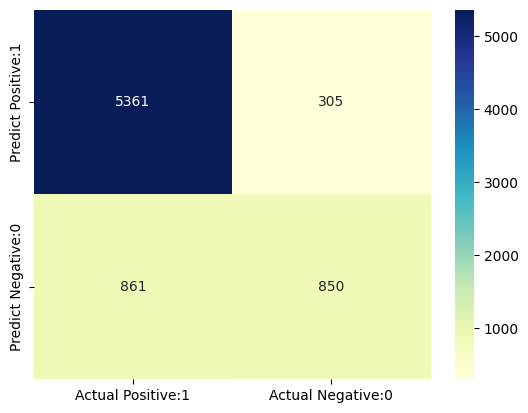

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5666
           1       0.74      0.50      0.59      1711

    accuracy                           0.84      7377
   macro avg       0.80      0.72      0.75      7377
weighted avg       0.83      0.84      0.83      7377

